# Parcial - Regresión

In [2]:
# Librerias

import warnings
warnings.filterwarnings('ignore')

import pandas as pd

import seaborn as sns
sns.set_style("darkgrid")
import matplotlib.pyplot as plt
import numpy as np

from sklearn.preprocessing import OneHotEncoder

import mglearn
import matplotlib

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score

## Cargar los datos

In [3]:
datawind = pd.read_csv('C:/ProgramasML/ML/Ejemplosclase/DatosParcial/data_treino_dv_df_2000_2010.csv')

# EDA Datos Wind Speed

Iniciamos la exploración con un overview de los datos

In [4]:
datawind.head()

,HORA (UTC),"VENTO, DIREï¿½ï¿½O HORARIA (gr) (ï¿½ (gr))","VENTO, VELOCIDADE HORARIA (m/s)",UMIDADE REL. MAX. NA HORA ANT. (AUT) (%),UMIDADE REL. MIN. NA HORA ANT. (AUT) (%),TEMPERATURA Mï¿½XIMA NA HORA ANT. (AUT) (ï¿½C),TEMPERATURA Mï¿½NIMA NA HORA ANT. (AUT) (ï¿½C),"UMIDADE RELATIVA DO AR, HORARIA (%)","PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)","PRECIPITAï¿½ï¿½O TOTAL, HORï¿½RIO (mm)","VENTO, RAJADA MAXIMA (m/s)",PRESSï¿½O ATMOSFERICA MAX.NA HORA ANT. (AUT) (mB),PRESSï¿½O ATMOSFERICA MIN. NA HORA ANT. (AUT) (mB)
0,12:00,0.809017,1.8,69.0,60.0,22.6,20.7,61.0,888.2,0.0,3.8,888.2,887.7
1,13:00,0.965926,2.7,62.0,55.0,24.2,22.5,55.0,888.4,0.0,4.7,888.4,888.2
2,14:00,0.891007,2.0,56.0,50.0,25.5,24.3,51.0,888.1,0.0,4.9,888.4,888.1
3,15:00,0.848048,2.5,52.0,44.0,27.4,25.0,44.0,887.4,0.0,5.8,888.1,887.4
4,16:00,0.224951,2.4,50.0,43.0,27.1,25.5,46.0,886.5,0.0,5.8,887.4,886.5


In [5]:
datawind.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87693 entries, 0 to 87692
Data columns (total 13 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   HORA (UTC)                                             87693 non-null  object 
 1   VENTO, DIREï¿½ï¿½O HORARIA (gr) (ï¿½ (gr))             87693 non-null  float64
 2   VENTO, VELOCIDADE HORARIA (m/s)                        87693 non-null  float64
 3   UMIDADE REL. MAX. NA HORA ANT. (AUT) (%)               87693 non-null  float64
 4   UMIDADE REL. MIN. NA HORA ANT. (AUT) (%)               87693 non-null  float64
 5   TEMPERATURA Mï¿½XIMA NA HORA ANT. (AUT) (ï¿½C)         87693 non-null  float64
 6   TEMPERATURA Mï¿½NIMA NA HORA ANT. (AUT) (ï¿½C)         87693 non-null  float64
 7   UMIDADE RELATIVA DO AR, HORARIA (%)                    87693 non-null  float64
 8   PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORAR

Cabiar el nombre de las columnas por unos más cortos

In [6]:
nuevos_nombres = ['Hora',
'Direccion',
'Velocidad',
'Humedmax',
'Humedmin',
'Tempmax',
'Tempmin',
'Humedad',
'Presion',
'Precipitacion',
'Rafagamaxviento',
'Presionmax',
'Presionmin',
]  # Lista de nuevos nombres en el mismo orden que las columnas existentes
datawind.columns = nuevos_nombres

In [7]:
datawind.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87693 entries, 0 to 87692
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Hora             87693 non-null  object 
 1   Direccion        87693 non-null  float64
 2   Velocidad        87693 non-null  float64
 3   Humedmax         87693 non-null  float64
 4   Humedmin         87693 non-null  float64
 5   Tempmax          87693 non-null  float64
 6   Tempmin          87693 non-null  float64
 7   Humedad          87693 non-null  float64
 8   Presion          87693 non-null  float64
 9   Precipitacion    87693 non-null  float64
 10  Rafagamaxviento  87693 non-null  float64
 11  Presionmax       87693 non-null  float64
 12  Presionmin       87693 non-null  float64
dtypes: float64(12), object(1)
memory usage: 8.7+ MB


Tengo un conjunto de datos de 87.693 muestras y 13 columnas, 12 de las cuales corresponden a valores reales y una objeto, que cambiaremos a continuación debido a que si corresponde a un valor numerico tipo hora.

In [8]:
# Convertir la columna 'hora' a tipo datetime
datawind['Hora'] = pd.to_datetime(datawind['Hora'], format='%H:%M').dt.time

In [9]:
datawind.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87693 entries, 0 to 87692
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Hora             87693 non-null  object 
 1   Direccion        87693 non-null  float64
 2   Velocidad        87693 non-null  float64
 3   Humedmax         87693 non-null  float64
 4   Humedmin         87693 non-null  float64
 5   Tempmax          87693 non-null  float64
 6   Tempmin          87693 non-null  float64
 7   Humedad          87693 non-null  float64
 8   Presion          87693 non-null  float64
 9   Precipitacion    87693 non-null  float64
 10  Rafagamaxviento  87693 non-null  float64
 11  Presionmax       87693 non-null  float64
 12  Presionmin       87693 non-null  float64
dtypes: float64(12), object(1)
memory usage: 8.7+ MB


- Comprobación de duplicados

In [10]:
# Verificar filas duplicadas
duplicados = datawind[datawind.duplicated()]

# Mostrar las filas duplicadas
print("Filas duplicadas:")
print(duplicados)

Filas duplicadas:
Empty DataFrame
Columns: [Hora, Direccion, Velocidad, Humedmax, Humedmin, Tempmax, Tempmin, Humedad, Presion, Precipitacion, Rafagamaxviento, Presionmax, Presionmin]
Index: []


- Comprobar datos nulos o faltantes

In [11]:
valores_nulos_por_columna = datawind.isnull().sum()
print(valores_nulos_por_columna)

Hora               0
Direccion          0
Velocidad          0
Humedmax           0
Humedmin           0
Tempmax            0
Tempmin            0
Humedad            0
Presion            0
Precipitacion      0
Rafagamaxviento    0
Presionmax         0
Presionmin         0
dtype: int64


La base de datos no tiene valores nulos, por ende, podemos seguir con el analisis sin hacer ninguna otra modificación. 

In [12]:
datawind.describe()

,Direccion,Velocidad,Humedmax,Humedmin,Tempmax,Tempmin,Humedad,Presion,Precipitacion,Rafagamaxviento,Presionmax,Presionmin
count,87693.000000,87693.000000,87693.000000,87693.000000,87693.000000,87693.000000,87693.000000,87693.000000,87693.000000,87693.000000,87693.000000,87693.000000
mean,0.405810,2.466192,69.058465,63.176194,21.921264,20.684570,66.146682,887.251925,0.160907,5.161076,887.580724,886.891093
std,0.686247,1.313968,19.640222,20.166336,3.721386,3.513744,19.992327,4.012404,1.307515,2.311157,3.646750,3.564539
min,-1.000000,0.000000,12.000000,10.000000,9.200000,8.400000,10.000000,863.400000,0.000000,0.000000,865.300000,862.800000
25%,-0.156434,1.500000,54.000000,48.000000,19.200000,18.400000,51.000000,885.300000,0.000000,3.400000,885.600000,885.000000
50%,0.788011,2.400000,72.000000,64.000000,21.400000,20.200000,68.000000,887.200000,0.000000,5.000000,887.500000,886.900000
75%,0.970296,3.400000,87.000000,80.000000,24.700000,23.100000,84.000000,889.100000,0.000000,6.800000,889.300000,888.800000
max,1.000000,10.000000,100.000000,98.000000,35.300000,34.400000,99.000000,1023.500000,70.800000,24.300000,913.100000,910.900000


Numerical Variables:
['Direccion', 'Velocidad', 'Humedmax', 'Humedmin', 'Tempmax', 'Tempmin', 'Humedad', 'Presion', 'Precipitacion', 'Rafagamaxviento', 'Presionmax', 'Presionmin']
Column:  Direccion
Skew: -0.86
Kurtosis:  -0.82


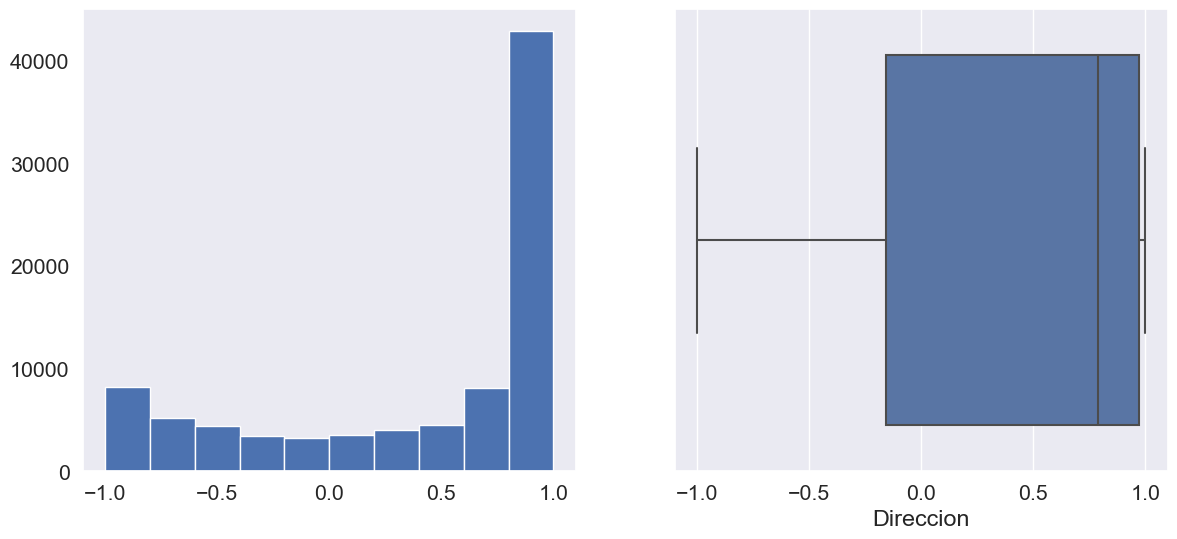

Column:  Velocidad
Skew: 0.37
Kurtosis:  -0.11


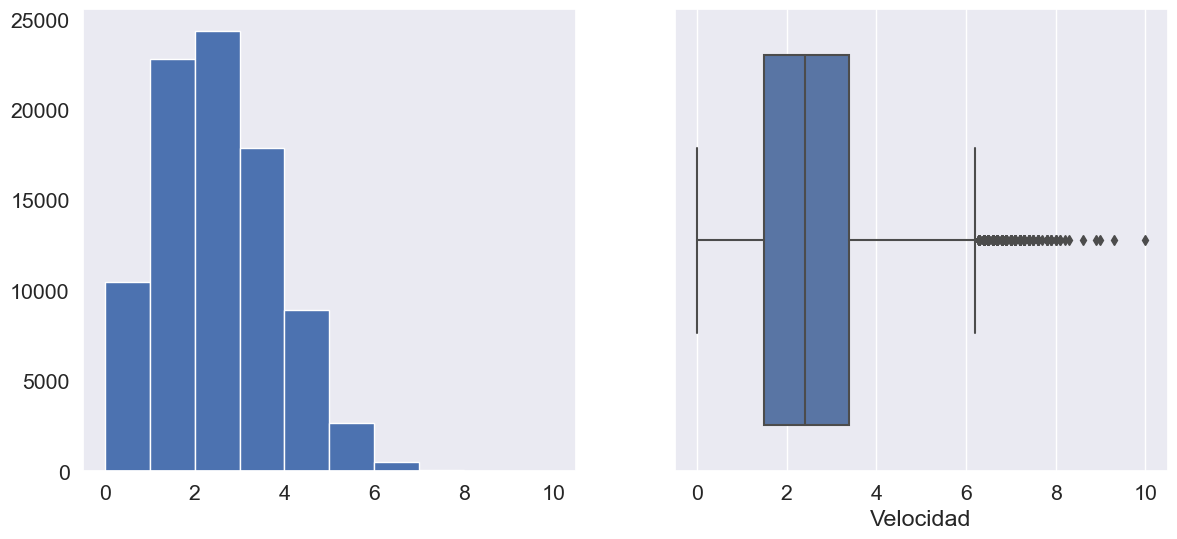

Column:  Humedmax
Skew: -0.48
Kurtosis:  -0.78


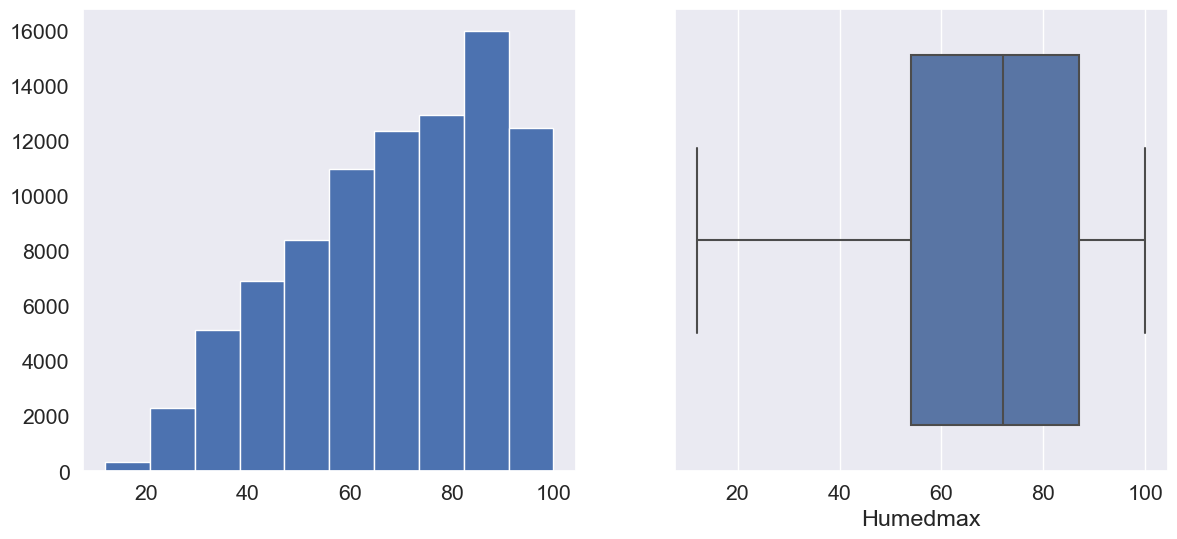

Column:  Humedmin
Skew: -0.23
Kurtosis:  -0.96


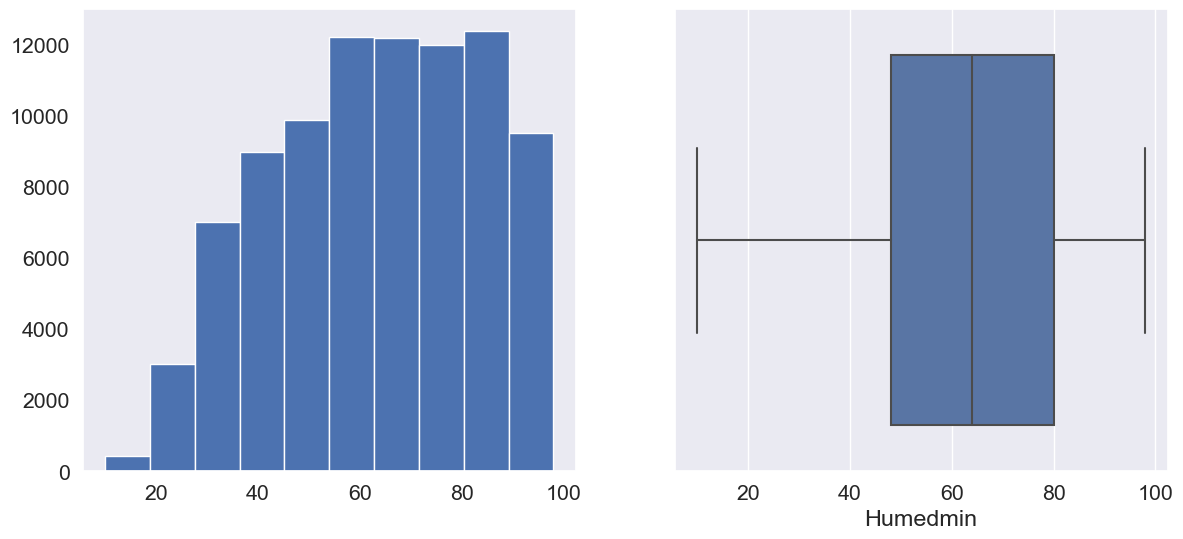

Column:  Tempmax
Skew: 0.26
Kurtosis:  -0.42


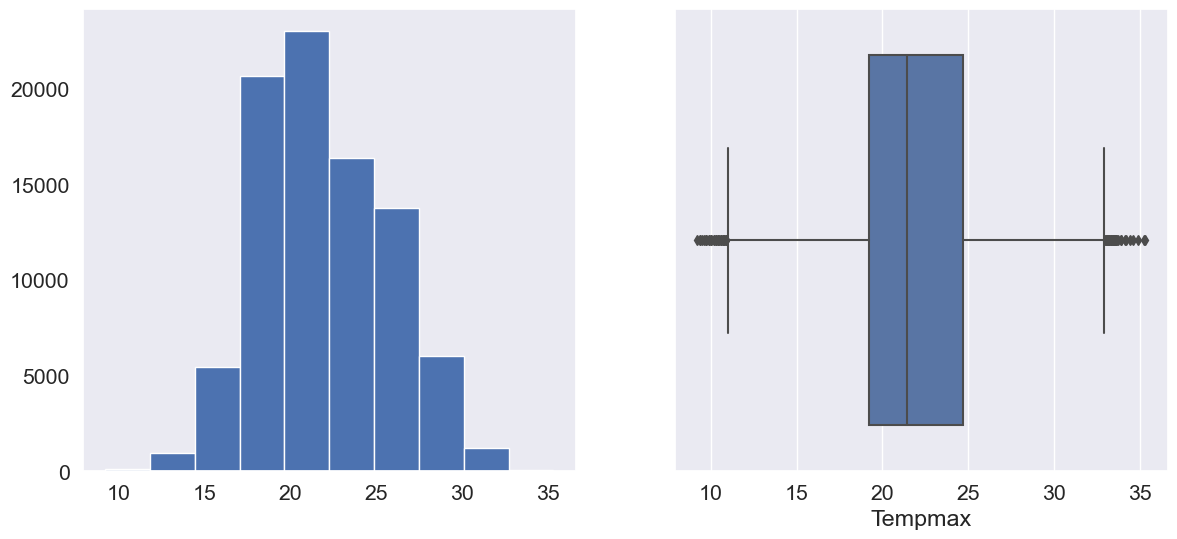

Column:  Tempmin
Skew: 0.24
Kurtosis:  -0.12


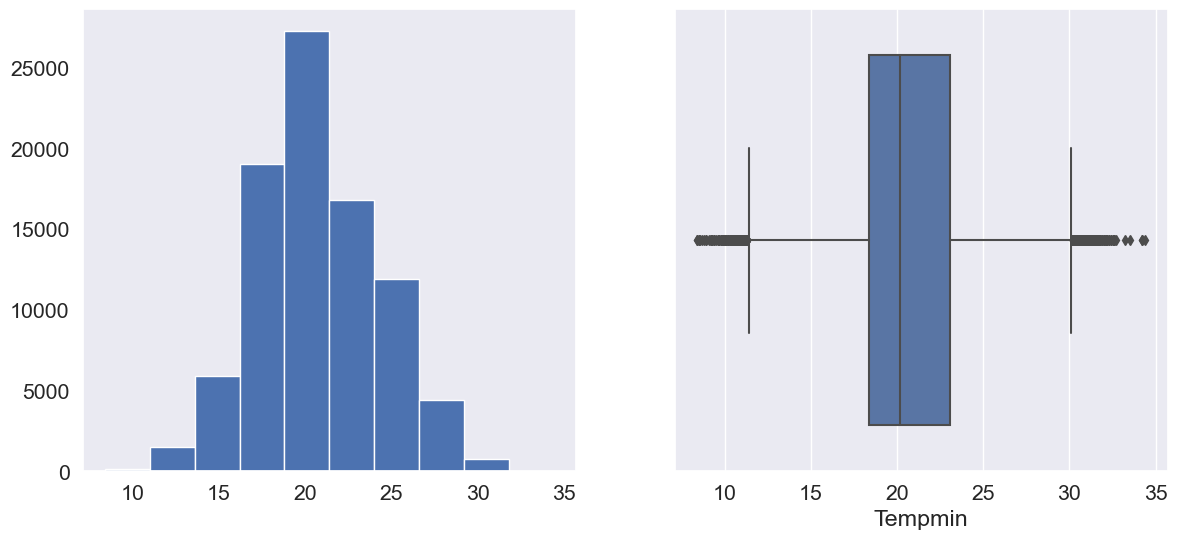

Column:  Humedad
Skew: -0.35
Kurtosis:  -0.89


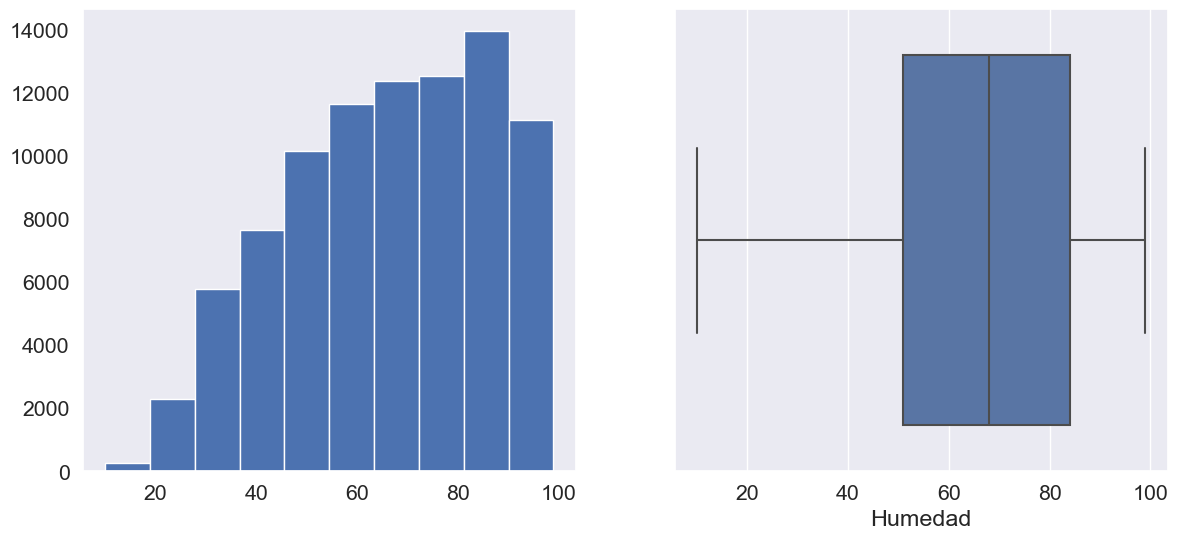

Column:  Presion
Skew: 6.18
Kurtosis:  179.64


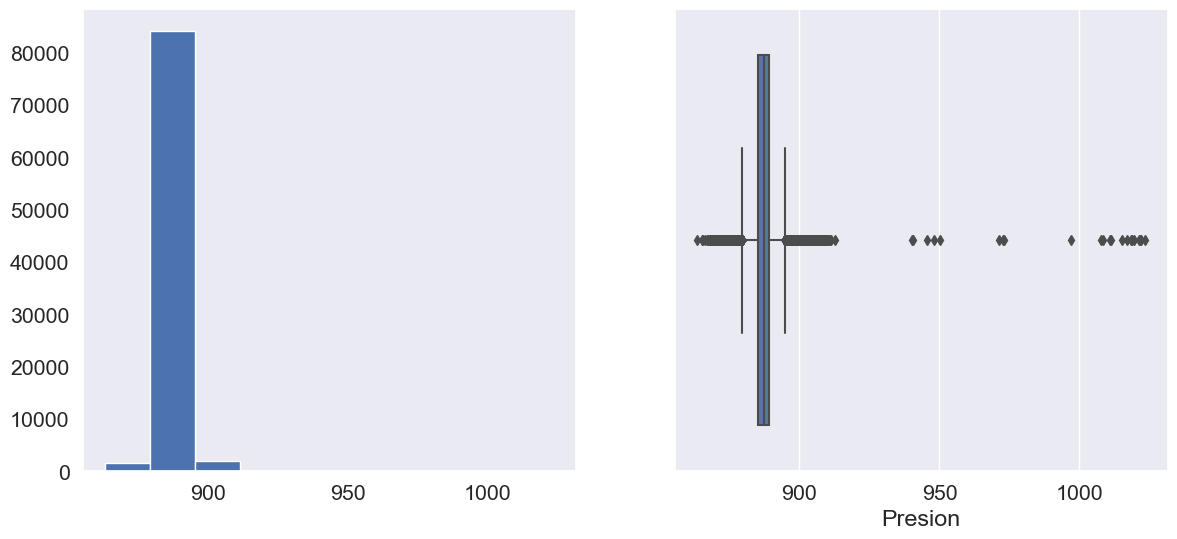

Column:  Precipitacion
Skew: 17.65
Kurtosis:  476.4


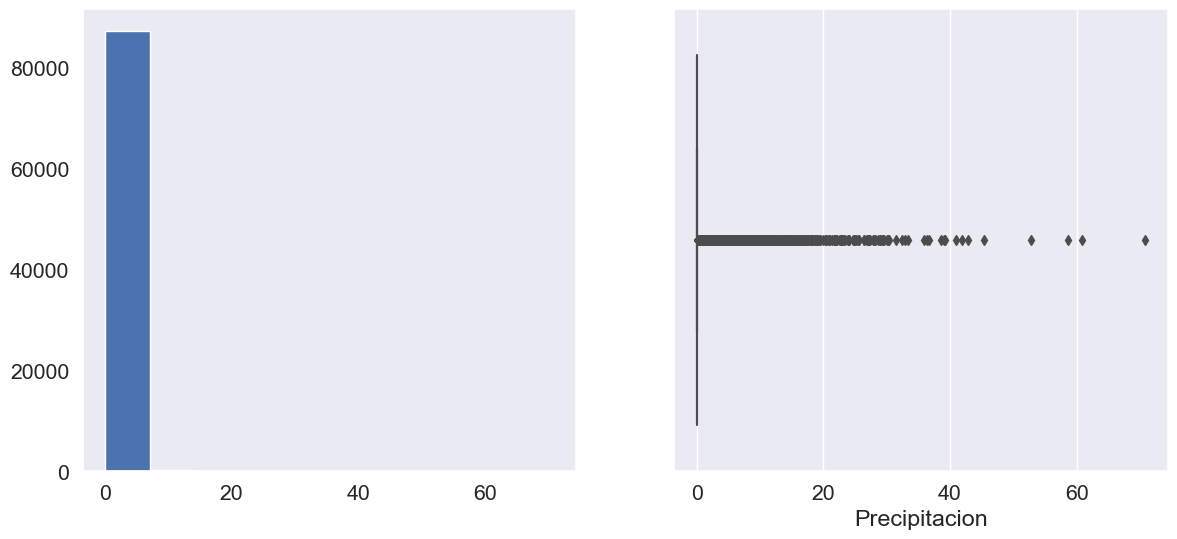

Column:  Rafagamaxviento
Skew: 0.41
Kurtosis:  0.11


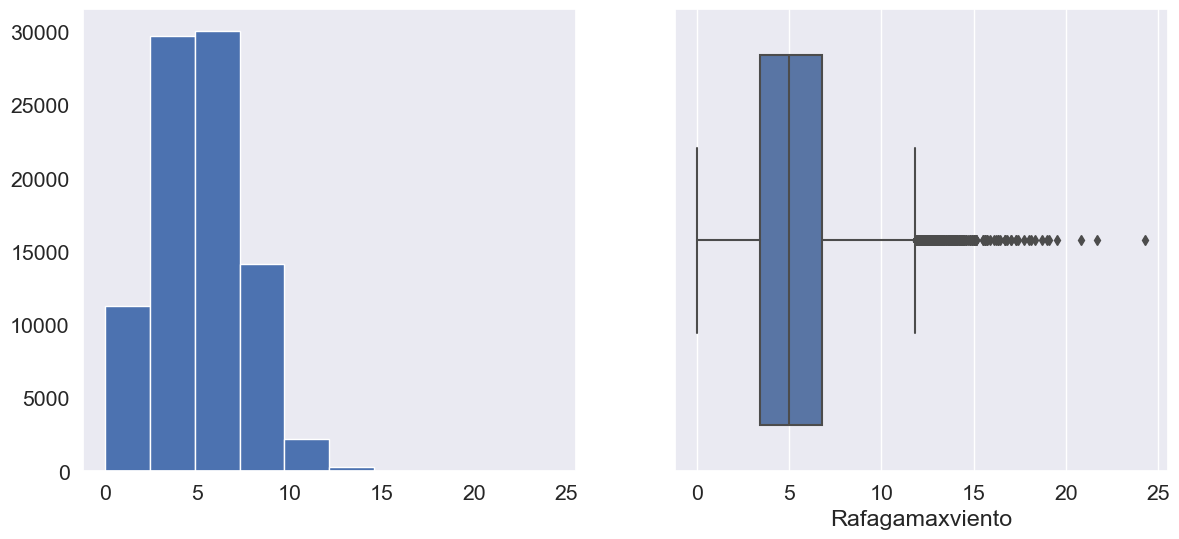

Column:  Presionmax
Skew: 1.02
Kurtosis:  5.82


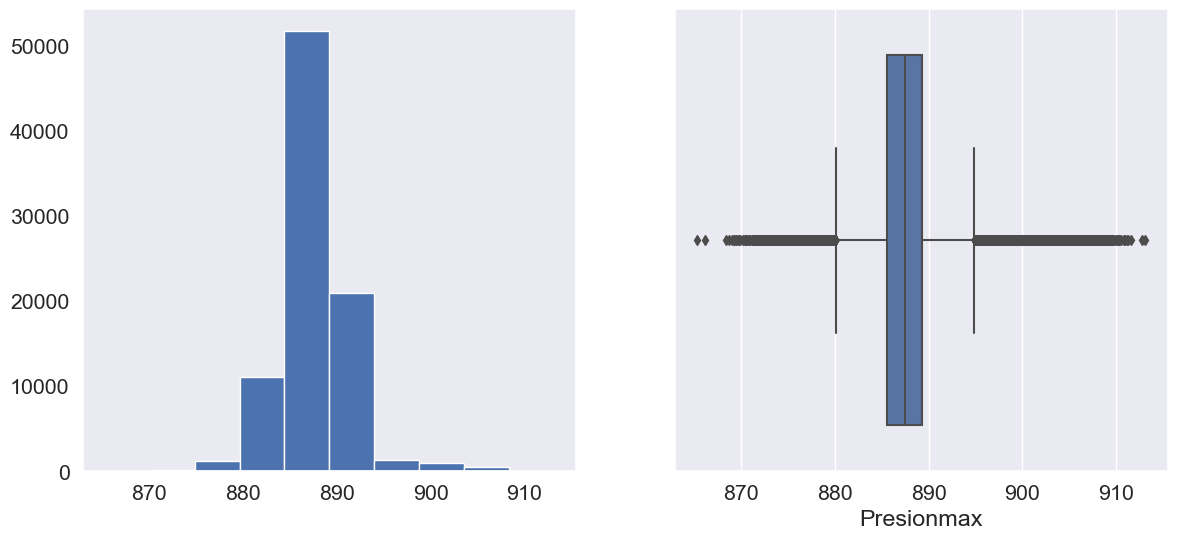

Column:  Presionmin
Skew: 0.33
Kurtosis:  4.91


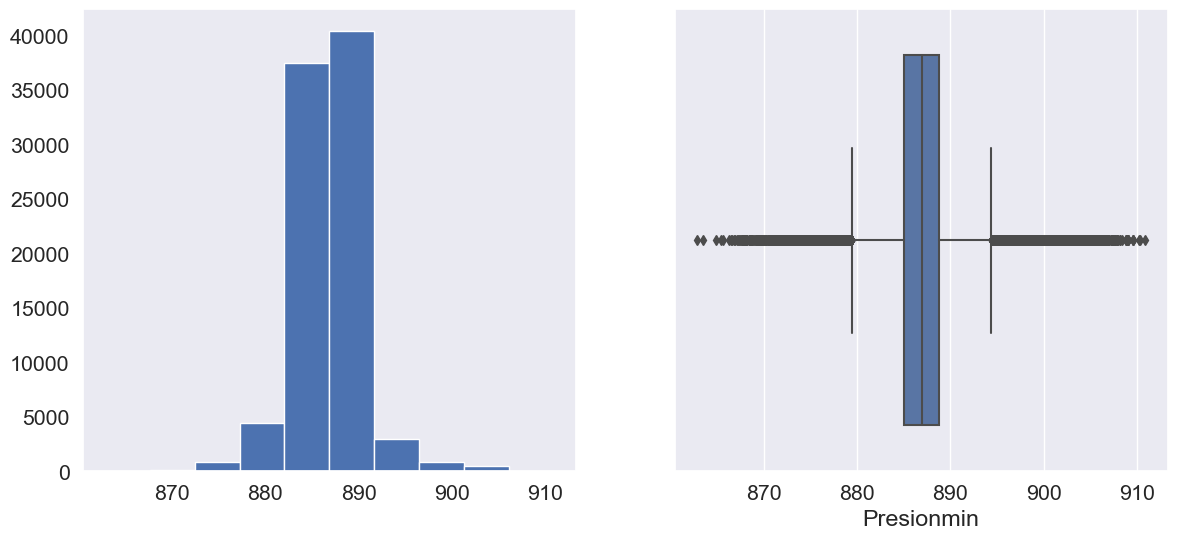

In [18]:
num_cols = datawind.select_dtypes(include=np.number).columns.tolist()
print("Numerical Variables:")
print(num_cols)

sns.set(font_scale=1.4)
for col in num_cols:
    print('Column: ', col)
    print('Skew:', round(datawind[col].skew(), 2))
    print('Kurtosis: ', round(datawind[col].kurtosis(), 2))
    plt.figure(figsize = (14, 6))
    plt.subplot(1, 2, 1)
    datawind[col].hist(grid=False)
    plt.subplot(1, 2, 2)
    sns.boxplot(x=datawind[col])
    plt.show()